In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### SMOTE (Synthetic Minority Over-sampling Technique)

SMOTE is a popular technique used to address class imbalance in datasets, especially for machine learning classification problems. Instead of simply duplicating minority class samples, SMOTE generates new synthetic samples by interpolating between existing minority class instances. This helps to provide a more balanced dataset, which can improve the performance of classifiers.

**Key Points:**

- SMOTE works by selecting a minority class sample and finding its k nearest minority class neighbors.
- It then creates synthetic samples along the line segments joining the selected sample and its neighbors.
- This approach helps to reduce overfitting that can occur with simple oversampling methods.

**Advantages:**

- Reduces bias towards the majority class.
- Helps classifiers learn better decision boundaries.

**Limitations:**

- May introduce noise if the minority class is highly overlapping with the majority class.
- Not suitable for all types of data (e.g., categorical features without preprocessing).

SMOTE is widely used in conjunction with machine learning workflows to improve model performance on imbalanced datasets.


In [23]:
from sklearn.datasets import make_classification

In [31]:
X, y = make_classification(
    n_samples=1000,
    n_redundant=0,
    n_features=2,
    n_clusters_per_class=1,
    weights=[0.9, 0.1],
    random_state=123,
)

In [32]:
X_df = pd.DataFrame(X, columns=["feature1", "feature2"])
y_df = pd.DataFrame(y, columns=["target"])
final_df = pd.concat([X_df, y_df], axis=1)

In [33]:
X_df

,feature1,feature2
0,-1.370383,-1.036569
1,2.022352,0.599597
2,0.232392,1.369993
3,0.601162,0.393403
4,1.530545,0.822184
...,...,...
995,-0.331942,0.992589
996,1.598354,0.576618
997,0.658242,1.176262
998,3.002777,1.622277


In [34]:
y_df

,target
0,1
1,0
2,0
3,0
4,0
...,...
995,0
996,0
997,0
998,0


In [35]:
final_df

,feature1,feature2,target
0,-1.370383,-1.036569,1
1,2.022352,0.599597,0
2,0.232392,1.369993,0
3,0.601162,0.393403,0
4,1.530545,0.822184,0
...,...,...,...
995,-0.331942,0.992589,0
996,1.598354,0.576618,0
997,0.658242,1.176262,0
998,3.002777,1.622277,0


In [36]:
final_df["target"].value_counts()

target
0    895
1    105
Name: count, dtype: int64

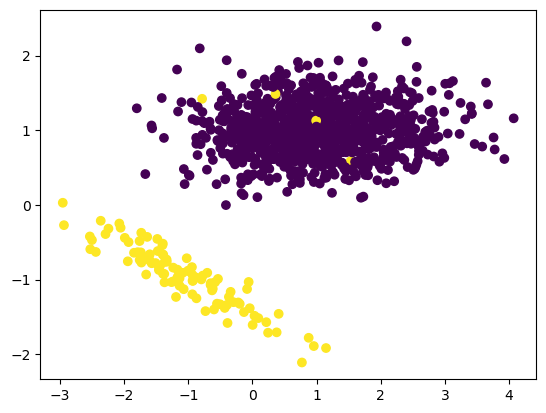

In [37]:
plt.scatter(
    final_df["feature1"],
    final_df["feature2"],
    c=final_df["target"],
)
plt.show()

In [40]:
from imblearn.over_sampling import SMOTE

In [ ]:
# transform the dataset using smote
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(
    final_df[["feature1", "feature2"]], final_df["target"]
)

In [43]:
X_resampled.shape, y_resampled.shape

((1790, 2), (1790,))

In [46]:
len(y_resampled[y_resampled == 0])

895

In [47]:
len(y_resampled[y_resampled == 1])

895

In [51]:
X_df = pd.DataFrame(X_resampled, columns=["feature1", "feature2"])
y_df = pd.DataFrame(y_resampled, columns=["target"])
oversampled_df = pd.concat([X_df, y_df], axis=1)

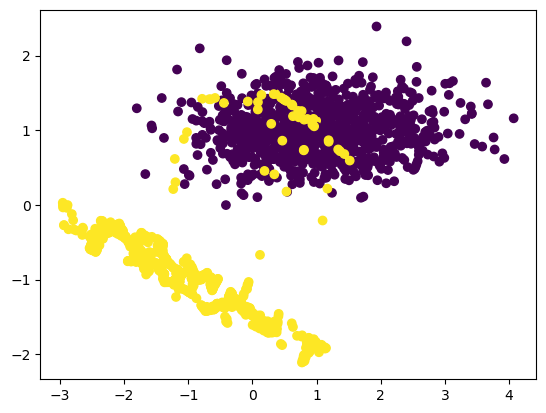

In [53]:
plt.scatter(
    oversampled_df["feature1"],
    oversampled_df["feature2"],
    c=oversampled_df["target"],
)
plt.show()